# EDA Case Study ( Lending Club )

In [40]:
#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [41]:
#importing libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#Importing data set in python
loan_df = pd.read_csv(r'C:\Users\dgoswami6\Desktop\loan.csv')

## Quick Glance of Data set

In [43]:
#Analysing the data set 
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [44]:
loan_df.shape

(39717, 111)

In [45]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Starting Data Cleaning 

In [46]:
#Checking NULL values in the data set
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [47]:
#Dropping the columns where NULL value is 39717 , All values are NULL
loan_df=loan_df.loc[:,loan_df.isnull().sum()!= 39717]

In [48]:
#Verifying the abve 
loan_df.isnull().sum()== 39717

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
desc                          False
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths              

In [49]:
#Checking for more columns to be removed 
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [50]:
#Dropping below columns as these will not be used in our analysis
loan_df = loan_df.drop(['id','emp_title', 'title', 'desc','url','initial_list_status','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens' ,'mths_since_last_record', 'mths_since_last_delinq' , 'next_pymnt_d' ,'zip_code','application_type', 'policy_code'] , axis=1)

In [52]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
pymnt_plan                 39717 non-null object
purpose                    39717 non-null object
addr_state                 39717 non-null object
dti      

In [53]:
#Removing duplicate rows if exist 
loan_df.drop_duplicates(inplace=True)

In [54]:
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,0.0


## Starting Data Standardization/ Sanitation 

In [55]:
#Rounding of all columns with monetary values and Striping unnecessary strings from below columns 
loan_df['term'] = loan_df.term.str.replace('months' , '')
loan_df['int_rate'] = loan_df.int_rate.str.replace('%' , '')
loan_df['emp_length'] = loan_df.emp_length.str.replace('years' , '')
loan_df['emp_length'] = loan_df.emp_length.str.replace('year' , '')
loan_df['revol_util'] = loan_df.revol_util.str.replace('%' , '')
loan_df.loan_amnt=loan_df.loan_amnt.round(decimals=2)
loan_df.funded_amnt=loan_df.funded_amnt.round(decimals=2)
loan_df.funded_amnt_inv=loan_df.funded_amnt_inv.round(decimals=2)
loan_df.installment=loan_df.installment.round(decimals=2)
loan_df.annual_inc=loan_df.annual_inc.round(decimals=2)
loan_df.revol_bal=loan_df.revol_bal.round(decimals=2)
loan_df.out_prncp=loan_df.out_prncp.round(decimals=2)
loan_df.out_prncp_inv=loan_df.out_prncp_inv.round(decimals=2)
loan_df.total_pymnt=loan_df.total_pymnt.round(decimals=2)
loan_df.total_pymnt_inv=loan_df.total_pymnt_inv.round(decimals=2)
loan_df.total_rec_prncp=loan_df.total_rec_prncp.round(decimals=2)
loan_df.total_rec_int=loan_df.total_rec_int.round(decimals=2)
loan_df.total_rec_late_fee=loan_df.total_rec_late_fee.round(decimals=2)
loan_df.recoveries=loan_df.recoveries.round(decimals=2)
loan_df.collection_recovery_fee=loan_df.collection_recovery_fee.round(decimals=2)
loan_df.last_pymnt_amnt=loan_df.last_pymnt_amnt.round(decimals=2)


In [56]:
loan_df.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,0.0
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,0.0
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0
4,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,0.0


## Creating Derived factor DTI Slot for our analysis 

In [57]:
#Creating Derived factor DTI Slot , Low dti , Medium dti and High Dti 
def slot(x):
    if x >=0.00 and x <=10.00:
        return 'Low dti'
    if x >=10.01 and x <=20.00:
        return 'Medium dti'
    if  x >=20.01 and x <=30.00:
        return 'High dti'
loan_df['dti Slot']=loan_df['dti'].apply(slot) 

In [58]:
#Verifying Derived factor 
loan_df['dti Slot']

0          High dti
1           Low dti
2           Low dti
3        Medium dti
4        Medium dti
5        Medium dti
6          High dti
7           Low dti
8           Low dti
9        Medium dti
10       Medium dti
11       Medium dti
12       Medium dti
13       Medium dti
14          Low dti
15         High dti
16       Medium dti
17       Medium dti
18       Medium dti
19          Low dti
20         High dti
21       Medium dti
22       Medium dti
23       Medium dti
24          Low dti
25         High dti
26       Medium dti
27       Medium dti
28          Low dti
29       Medium dti
            ...    
39687    Medium dti
39688    Medium dti
39689       Low dti
39690    Medium dti
39691    Medium dti
39692       Low dti
39693    Medium dti
39694       Low dti
39695       Low dti
39696       Low dti
39697    Medium dti
39698       Low dti
39699    Medium dti
39700       Low dti
39701    Medium dti
39702    Medium dti
39703       Low dti
39704    Medium dti
39705       Low dti


### Data Cleaning , Standardizing and management is done! We will start our Analysis now !!

#### Univariate Analysis 

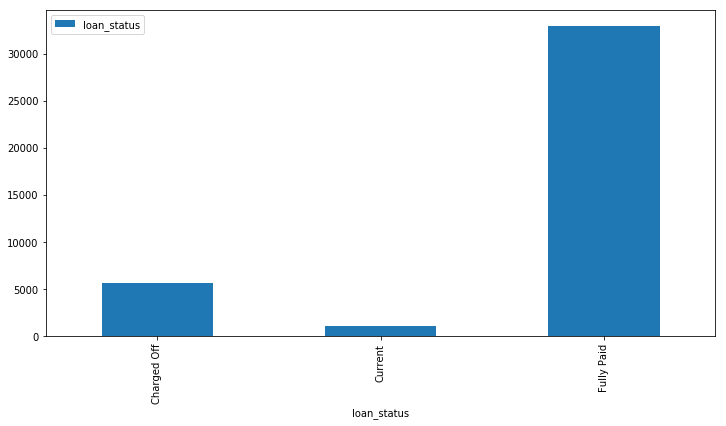

In [59]:
#Checking trend on Loan Application request by Loan Status
loan_status_group = loan_df.groupby(['loan_status'])
status_plot= pd.DataFrame(loan_status_group['loan_status'].count())
status_plot.plot.bar(figsize=(12,6))

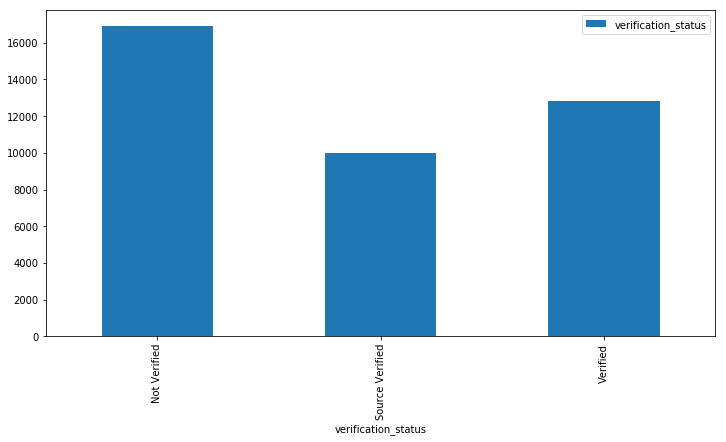

In [60]:
#Checking trend on Loan Application by Income verification_status
loan_Ver_status = loan_df.groupby(['verification_status'])
verif_plot=pd.DataFrame(loan_Ver_status['verification_status'].count())
verif_plot.plot.bar(figsize=(12,6))

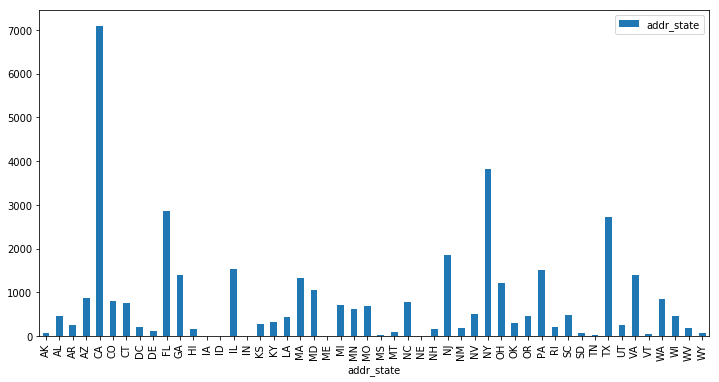

In [61]:
#Checking trend on Application request by State Code 
loan_application_State = loan_df.groupby(['addr_state'])
loan_app_plot=pd.DataFrame(loan_application_State['addr_state'].count())
loan_app_plot.plot.bar(figsize=(12,6))

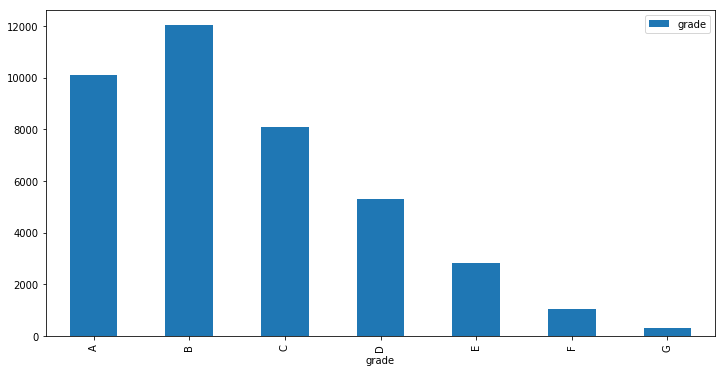

In [62]:
#Checking trend on Application request by Grade
grade_loan = loan_df.groupby(['grade'])
grade_plot = pd.DataFrame(grade_loan  ['grade'].count())
grade_plot .plot.bar(figsize=(12,6))  

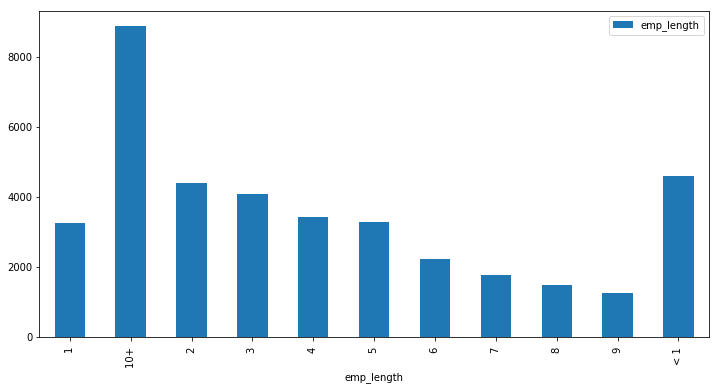

In [63]:
#Checking trend on Application request by Employee Job period
emp_length_loan = loan_df.groupby(['emp_length'])
emp_length_plot=pd.DataFrame(emp_length_loan['emp_length'].count())
emp_length_plot.plot.bar(figsize=(12,6)) 

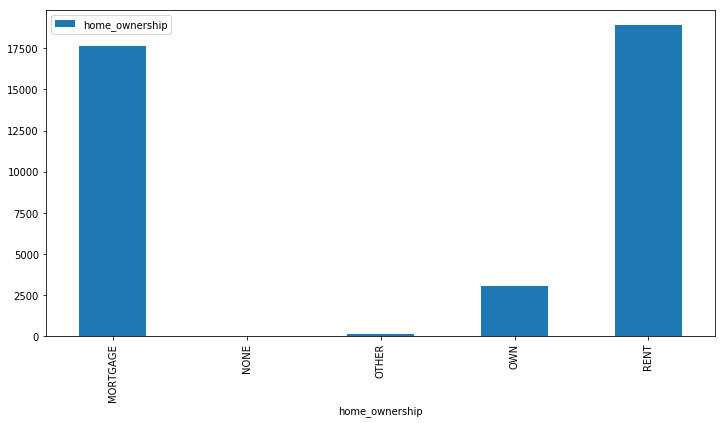

In [64]:
#Checking trend on Application request by Home ownership
home_ownership_loan = loan_df.groupby(['home_ownership'])
home_ownership_plot=pd.DataFrame(home_ownership_loan['home_ownership'].count())
home_ownership_plot.plot.bar(figsize=(12,6))  

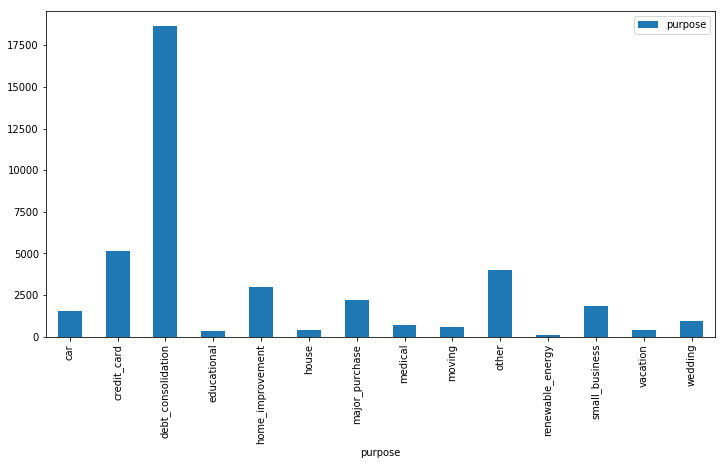

In [65]:
#Checking trend on Application request by Purpose
purpose_loan = loan_df.groupby(['purpose'])
purpose_plot=pd.DataFrame(purpose_loan['purpose'].count())
purpose_plot.plot.bar(figsize=(12,6))

#### Bivariate Analysis

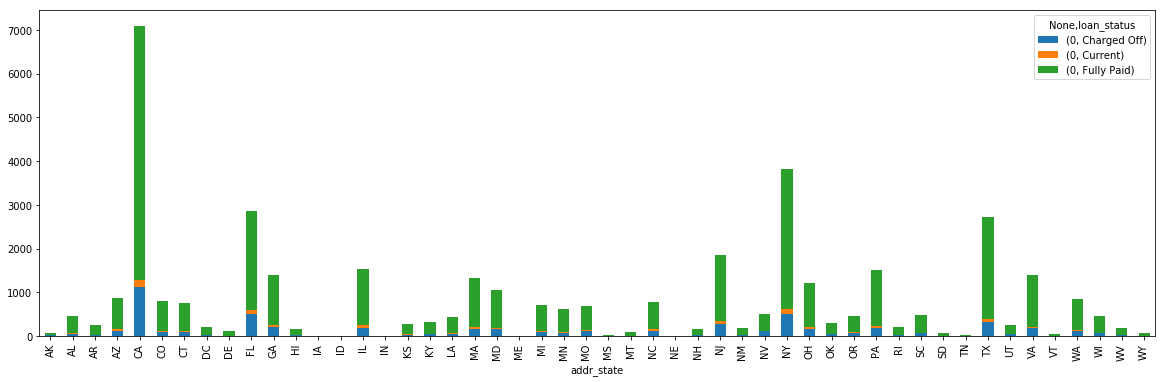

In [66]:
#Checking trend on Application request by State Code and Loan Status
addr_plot = loan_df.groupby(['addr_state', 'loan_status']).size().reset_index().pivot(columns='loan_status', index='addr_state')
addr_plot.plot(kind='bar', stacked=True,figsize=(20,6)) 

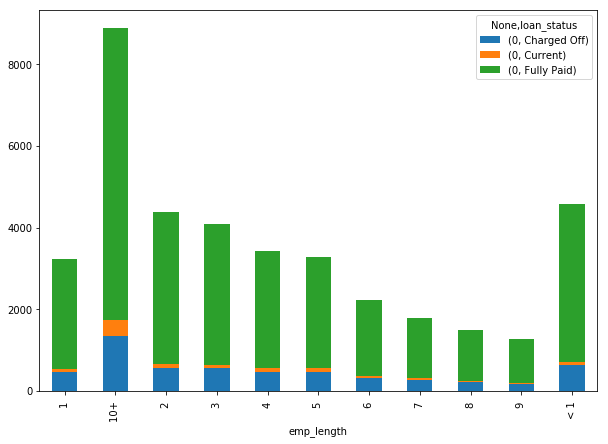

In [67]:
#Checking trend on Application request by Employee Lenght and Loan Status
emp_stat_plot = loan_df.groupby(['emp_length', 'loan_status']).size().reset_index().pivot(columns='loan_status', index='emp_length')
emp_stat_plot.plot(kind='bar', stacked=True,figsize=(10,7)) 

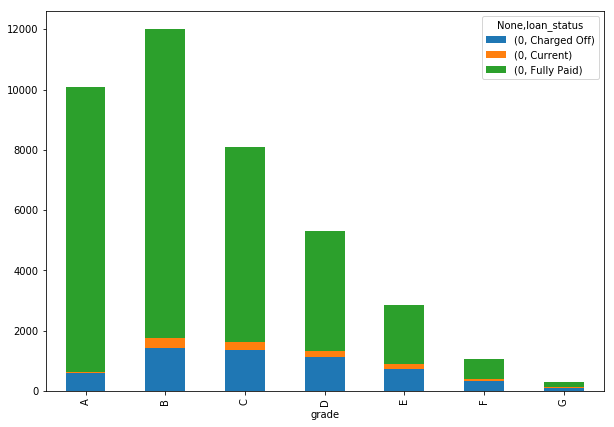

In [68]:
#Checking trend on Application request by Grade and Loan Status
grade_stat_plot = loan_df.groupby(['grade', 'loan_status']).size().reset_index().pivot(columns='loan_status', index='grade')
grade_stat_plot.plot(kind='bar', stacked=True,figsize=(10,7))

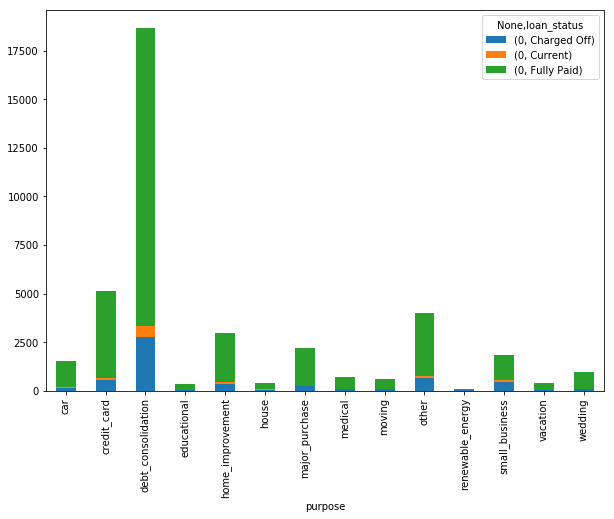

In [69]:
#Checking trend on Application request by Purpose and Loan Status
purpose_stat_plot = loan_df.groupby(['purpose', 'loan_status']).size().reset_index().pivot(columns='loan_status', index='purpose')
purpose_stat_plot.plot(kind='bar', stacked=True,figsize=(10,7))

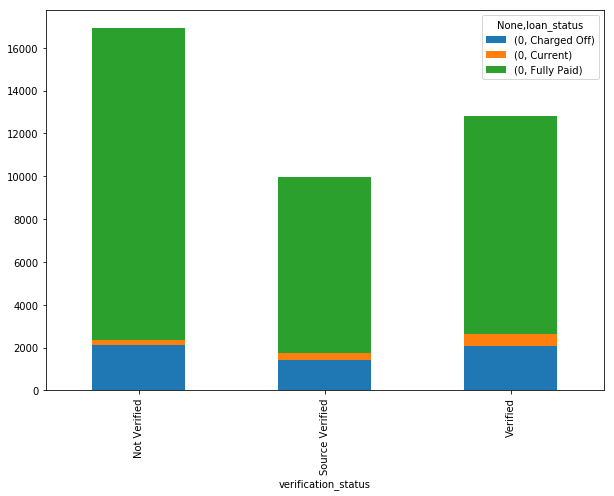

In [70]:
#Checking trend on Application request by Income Verification Status and Loan Status
veri_stat_plot = loan_df.groupby(['verification_status', 'loan_status']).size().reset_index().pivot(columns='loan_status', index='verification_status')
veri_stat_plot.plot(kind='bar', stacked=True,figsize=(10,7)) 

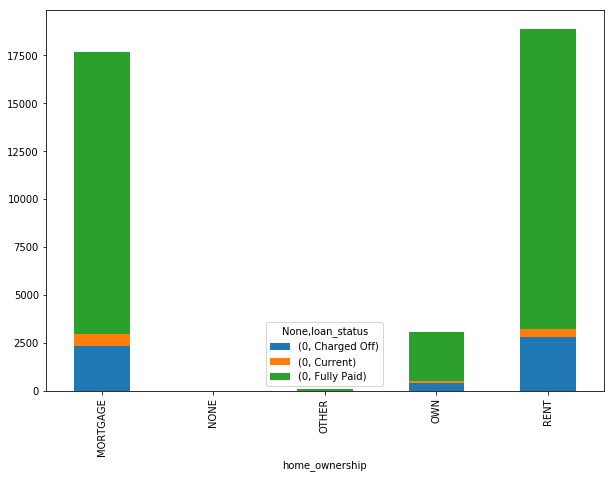

In [71]:
#Checking trend on Application request by Income Home Ownership and Loan Status
own_stat_plot = loan_df.groupby(['home_ownership', 'loan_status']).size().reset_index().pivot(columns='loan_status', index='home_ownership')
own_stat_plot.plot(kind='bar', stacked=True,figsize=(10,7)) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AF3231BE0>,
      dtype=object)

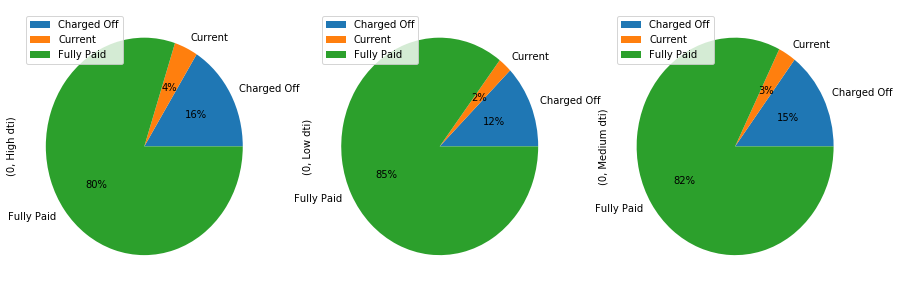

In [72]:
#Checking trend on Application request by DTI Slot Ownership and Loan Status
dti_plot = loan_df.groupby(['dti Slot', 'loan_status']).size().reset_index().pivot(columns='dti Slot', index='loan_status')
dti_plot.plot(kind='pie',subplots=True,autopct='%1.0f%%',figsize=(15,5))

#### We are done with our Uni and Bivariate Analysis , found out some wondeful insights, Also concluded some factors that we will use to decide if customer are more like to be a Default or not!

In [73]:
#Exporting Final Data Frame for presentation preparation 
loan_df.to_csv(r'C:\Users\dgoswami6\Downloads\cleaned_loan_df.csv',sep =',',encoding='utf-8')  